<a href="https://colab.research.google.com/github/nishnarudkar/Solar_Radiation_Prediction/blob/main/Regression_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload dataset from local machine



Saving Solar_radiation_regression.csv to Solar_radiation_regression.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Solar_radiation_regression.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())  # Show the first few rows
print(df.info())  # Display column details


                  Site  Latitude  Longitude        Date  Air Temperature (C°)  \
0  Shaqra - University  25.17279   45.14198  2014-05-01                  31.8   
1  Shaqra - University  25.17279   45.14198  2014-06-01                  34.3   
2  Shaqra - University  25.17279   45.14198  2014-07-01                  35.6   
3  Shaqra - University  25.17279   45.14198  2014-08-01                  36.3   
4  Shaqra - University  25.17279   45.14198  2014-09-01                  33.8   

   Air Temperature Uncertainty (C°)  Wind Direction at 3m (°N)  \
0                               0.5                       57.0   
1                               0.5                      359.0   
2                               0.5                      336.0   
3                               0.5                       25.0   
4                               0.5                       66.0   

   Wind Direction at 3m Uncertainty (°N)  Wind Speed at 3m (m/s)  \
0                                    4.0        

In [ ]:
#Preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features and target variable
features = df.drop(columns=['Site', 'Date', 'GHI (Wh/m2)'])  # Drop irrelevant and target columns
target = df['GHI (Wh/m2)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Build a Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 16497.231586924983
Mean Absolute Error: 103.41292923307931
R-squared: 0.9905735696799133


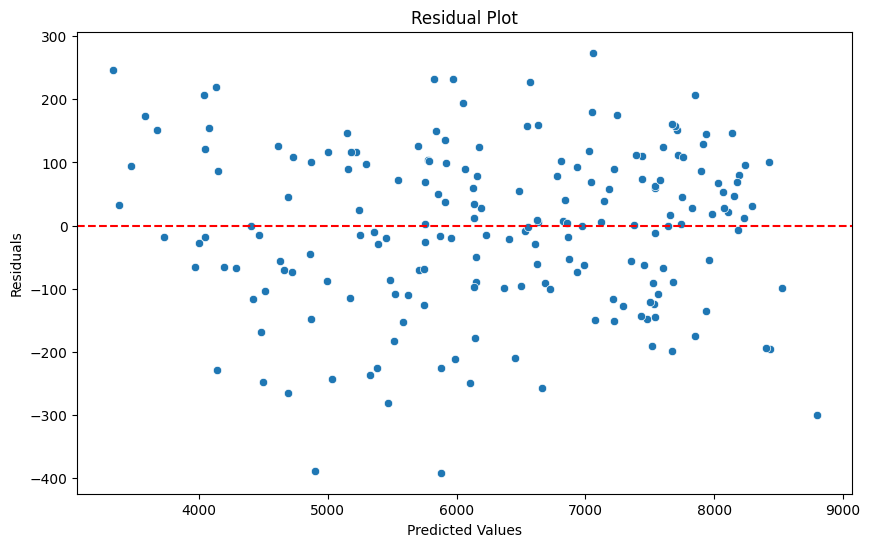

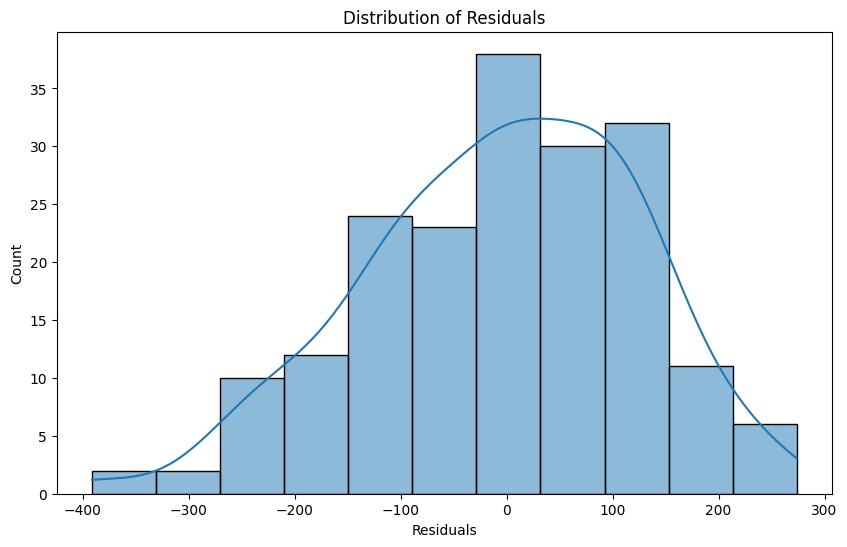

In [ ]:
#Error Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


**Visualizing actual vs predicted values**

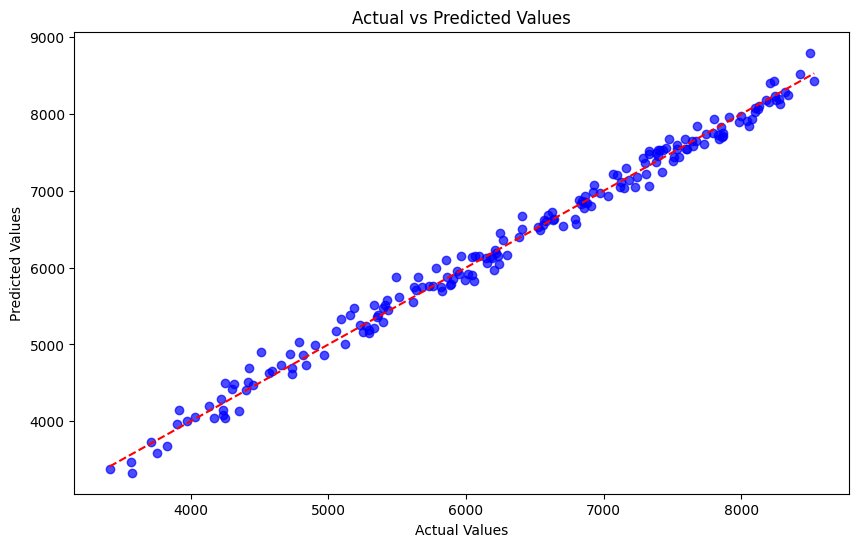

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [ ]:
#Improving the model using Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (degree 2 as an example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 16497.231586924983
Mean Absolute Error: 103.41292923307931
R-squared: 0.9905735696799133


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'linear_regression_model_best_model.pkl')

print("Linear Regression model saved as 'linear_regression_model_best_model.pkl'")


Linear Regression model saved as 'linear_regression_model_best_model.pkl'


In [ ]:
#Trying different algorithms
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on test set
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Random Forest MSE: 38550.63
Random Forest R²: 0.98


In [ ]:
#Hypertunning to improve the performance
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


# Grid search for the best parameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=3,
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_rf_y_pred = best_rf_model.predict(X_test)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)
print(f"Tuned Random Forest R²: {best_rf_r2:.2f}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set using the tuned model
tuned_y_pred = best_rf_model.predict(X_test)

# Evaluate performance
tuned_mse = mean_squared_error(y_test, tuned_y_pred)
tuned_mae = mean_absolute_error(y_test, tuned_y_pred)
tuned_r2 = r2_score(y_test, tuned_y_pred)

# Print results for the tuned model
print("Performance of the Tuned Model:")
print(f"Tuned Mean Squared Error (MSE): {tuned_mse:.2f}")
print(f"Tuned Mean Absolute Error (MAE): {tuned_mae:.2f}")
print(f"Tuned R-squared (R²): {tuned_r2:.2f}")


Performance of the Tuned Model:
Tuned Mean Squared Error (MSE): 41407.96
Tuned Mean Absolute Error (MAE): 153.03
Tuned R-squared (R²): 0.98


In [ ]:
# Assuming original model metrics are stored
print("Comparison of Original and Tuned Model Performance:")
print(f"Original R²: {r2:.2f} vs Tuned R²: {tuned_r2:.2f}")
print(f"Original MSE: {mse:.2f} vs Tuned MSE: {tuned_mse:.2f}")
print(f"Original MAE: {mae:.2f} vs Tuned MAE: {tuned_mae:.2f}")


Comparison of Original and Tuned Model Performance:
Original R²: 0.99 vs Tuned R²: 0.98
Original MSE: 16497.23 vs Tuned MSE: 41407.96
Original MAE: 103.41 vs Tuned MAE: 153.03


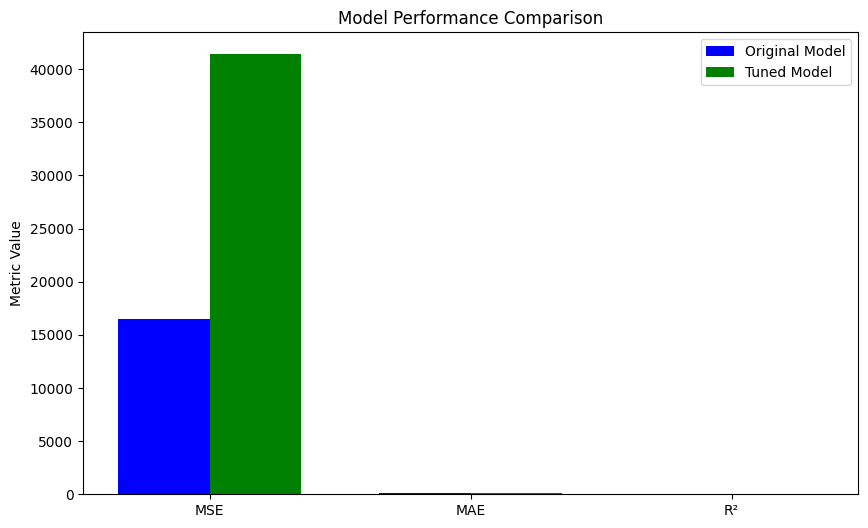

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
labels = ['MSE', 'MAE', 'R²']
original = [mse, mae, r2]
tuned = [tuned_mse, tuned_mae, tuned_r2]

# Bar plot
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, original, width, label='Original Model', color='blue')
plt.bar(x + width/2, tuned, width, label='Tuned Model', color='green')
plt.xticks(x, labels)
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.legend()
plt.show()


In [ ]:
# Summarize performance metrics
print(f"Linear Regression R²: {r2:.2f}")
print(f"Random Forest R² (without tuning): {rf_r2:.2f}")
print(f"Tuned Random Forest R²: {best_rf_r2:.2f}")

# Save key results to a CSV or file for reference
results = {
    "Model": ["Linear Regression", "Random Forest (Untuned)", "Random Forest (Tuned)"],
    "R²": [r2, rf_r2, best_rf_r2],
    "MSE": [mse, rf_mse, mean_squared_error(y_test, best_rf_y_pred)]
}

results_df = pd.DataFrame(results)
results_df.to_csv('model_comparison_results.csv', index=False)


Linear Regression R²: 0.99
Random Forest R² (without tuning): 0.98
Tuned Random Forest R²: 0.98


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Example Random Forest model
rf_model = RandomForestClassifier()

# Fit the model (replace with your actual data)
# X_train, y_train = your_data
# rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_regression_model.pkl')


['random_forest_regression_model.pkl']